base10_quantum_entanglement.html


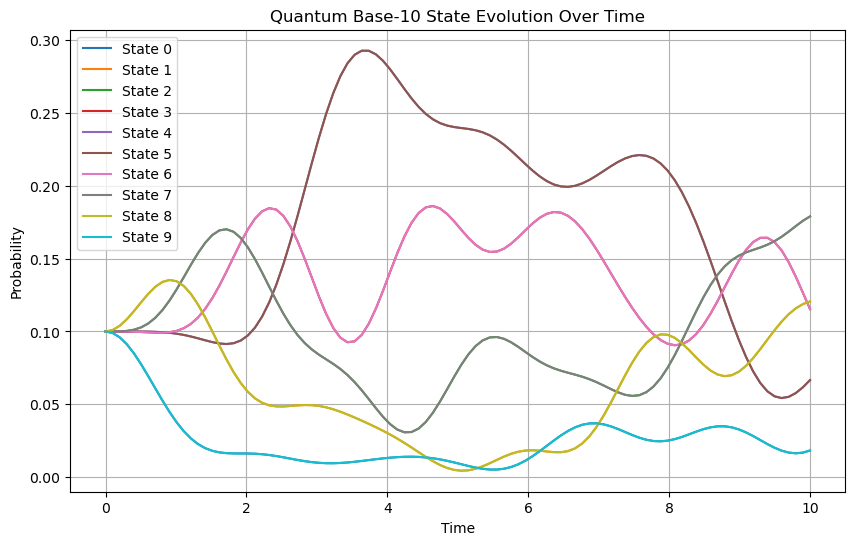

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from qutip import basis, mesolve, Qobj
import matplotlib.pyplot as plt
from pyvis.network import Network

# -----------------------------------------------------------------------------
# Quantum Base-10 System Simulation
# -----------------------------------------------------------------------------
# This script demonstrates a basic quantum system with a base-10 (decimal)
# configuration using the QuTiP library. Each digit from 0 to 9 represents
# a distinct quantum state. The system evolves over time under a defined
# Hamiltonian, allowing transitions between neighboring states. The evolution
# is simulated, and the probabilities of each state are visualized both
# numerically and graphically.

# -----------------------------------------------------------------------------
# Step 1: Define the Evolution Steps and System Dimensions
# -----------------------------------------------------------------------------

# 'evolution_steps' represents a sequence of integers that will be used to
# create an initial superposition state. The modulo operation ensures that
# each step maps to one of the 10 base states (0-9).
evolution_steps = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 'dim' defines the dimensionality of the quantum system. For a base-10 system,
# we have 10 distinct states labeled from 0 to 9.
dim = 10

# -----------------------------------------------------------------------------
# Step 2: Initialize the Quantum State as a Superposition
# -----------------------------------------------------------------------------
# In quantum mechanics, a system can exist in a superposition of multiple states.
# Here, we create an initial state that is a normalized superposition of the
# base-10 states corresponding to the provided evolution steps.

# Initialize the superposition by summing the basis states. The 'basis' function
# from QuTiP creates a quantum state vector for a given basis state.
# 'i % 10' ensures that each evolution step maps to one of the 10 base states.
initial_state = sum(basis(dim, i % 10) for i in evolution_steps)

# Normalize the initial state to ensure that the total probability sums to 1.
initial_state = initial_state.unit()

# -----------------------------------------------------------------------------
# Step 3: Define the Hamiltonian for the System
# -----------------------------------------------------------------------------
# The Hamiltonian operator governs the time evolution of the quantum system.
# It encapsulates the total energy of the system and dictates how the system
# transitions between different states over time.

# Initialize the Hamiltonian as a zero matrix of size (dim x dim). This will be
# updated to include interactions (transitions) between neighboring states.
H = Qobj(np.zeros((dim, dim)))

# Define transitions between neighboring base-10 states.
# For a base-10 system, we assume that each state can transition to its
# immediate neighbor (e.g., state 0 <-> state 1, state 1 <-> state 2, etc.).
# The Hamiltonian includes terms that allow these transitions.

for i in range(dim - 1):
    # Create the lowering and raising operators between states i and i+1.
    # 'basis(dim, i)' creates the ket |i>, and 'basis(dim, i+1).dag()' creates
    # the bra <i+1|. The product |i><i+1| + |i+1><i| allows for symmetric
    # transitions between the two states.
    transition = basis(dim, i) * basis(dim, i + 1).dag() + basis(dim, i + 1) * basis(dim, i).dag()
    H += transition

# The resulting Hamiltonian H allows the system to transition between adjacent states
# with equal probability amplitudes, modeling a simple chain of states.

# -----------------------------------------------------------------------------
# Step 4: Set Up Time Evolution Parameters
# -----------------------------------------------------------------------------
# To simulate how the quantum state evolves over time, we define a range of time
# points at which we will evaluate the state of the system.

# 'times' is a NumPy array of 100 evenly spaced points between 0 and 10 (arbitrary units).
# This defines the timeline over which the system's evolution is simulated.
times = np.linspace(0, 10, 100)

# -----------------------------------------------------------------------------
# Step 5: Simulate the Time Evolution of the Quantum System
# -----------------------------------------------------------------------------
# QuTiP's 'mesolve' function is used to numerically solve the time-dependent
# Schrödinger equation for the system, given the Hamiltonian, initial state, and time points.

# 'mesolve' parameters:
# - H: Hamiltonian operator
# - initial_state: initial quantum state vector
# - times: array of time points
# - []: list of collapse operators (empty here, implying a closed system with no decoherence)
# - []: list of expectation operators (empty here, as we're not directly calculating expectation values)
result = mesolve(H, initial_state, times, [], [])

# -----------------------------------------------------------------------------
# Step 6: Extract Evolved States and Calculate Probabilities
# -----------------------------------------------------------------------------
# After simulating the evolution, we extract the state vectors at each time point
# and compute the probability of the system being in each of the base-10 states.

# 'result.states' contains the state vector of the system at each time point.
evolved_states = result.states

# Initialize a 2D NumPy array to store the probabilities of each state at each time.
# Rows correspond to time points, and columns correspond to the 10 base states.
state_probabilities = np.zeros((len(times), dim))

# Loop over each time point and each state to calculate the probability.
for t_index, state in enumerate(evolved_states):
    for state_index in range(dim):
        # The probability of being in a particular state is the squared magnitude
        # of the amplitude of that state in the state vector.
        state_probabilities[t_index, state_index] = np.abs(state[state_index, 0])**2

# -----------------------------------------------------------------------------
# Step 7: Save State Probabilities to a CSV File
# -----------------------------------------------------------------------------
# For further analysis or record-keeping, we save the state probabilities
# to a CSV file. Each column corresponds to a base state, and each row
# corresponds to a time point.

# Create a pandas DataFrame with appropriate column names.
state_df = pd.DataFrame(state_probabilities, columns=[f"State {i}" for i in range(dim)])

# Save the DataFrame to a CSV file without including the index.
state_df.to_csv("base10_quantum_evolution.csv", index=False)

# -----------------------------------------------------------------------------
# Step 8: Visualize the Quantum System as a Network using PyVis
# -----------------------------------------------------------------------------
# We use PyVis to create an interactive network graph where each node represents
# a base-10 state, and edges represent possible transitions (entanglement) between states.

# Initialize the network graph with specific styling parameters.
net = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white")

# Add nodes to the network for each base state (0-9).
for i in range(dim):
    # 'label' is the name displayed on the node.
    # 'size' determines the visual size of the node.
    net.add_node(i, label=f"State {i}", size=30)

# Add edges between nodes to represent possible transitions.
# In this simple model, every state is connected to every other state,
# but you can modify this to reflect actual physical connections.
for i in range(dim):
    for j in range(i + 1, dim):
        net.add_edge(i, j)

# Generate and save the interactive network graph as an HTML file.
net.show("base10_quantum_entanglement.html")

# -----------------------------------------------------------------------------
# Step 9: Plot the Probability of Each State Over Time using Matplotlib
# -----------------------------------------------------------------------------
# Visualizing how the probability of each state changes over time provides
# intuitive insight into the dynamics of the quantum system.

# Initialize a new figure with a specified size.
plt.figure(figsize=(10, 6))

# Plot the probability of each state as a function of time.
for i in range(dim):
    plt.plot(times, state_probabilities[:, i], label=f"State {i}")

# Add a title and labels to the axes for clarity.
plt.title("Quantum Base-10 State Evolution Over Time")
plt.xlabel("Time")
plt.ylabel("Probability")

# Add a legend to distinguish between different states.
plt.legend()

# Add a grid for better readability of the plot.
plt.grid(True)

# Save the plot as a PNG image file.
plt.savefig("quantum_evolution_plot.png")

# Display the plot in the output.
plt.show()
